In [92]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import numpy as np

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])

import warnings

warnings.filterwarnings(action='ignore')

In [177]:
ether_raw = pd.read_csv('./data/ether_investing.csv', thousands=',')
ether_raw

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 12월 27일,4064.24,4062.02,4087.20,4049.39,252.96K,0.07%
1,2021년 12월 26일,4061.27,4093.38,4104.23,4005.38,283.58K,-0.78%
2,2021년 12월 25일,4093.14,4043.60,4136.03,4024.87,308.53K,1.23%
3,2021년 12월 24일,4043.39,4110.20,4133.77,4024.24,353.85K,-1.62%
4,2021년 12월 23일,4110.14,3979.57,4149.17,3895.89,573.18K,3.28%
...,...,...,...,...,...,...,...
2114,2016년 03월 14일,12.50,15.07,15.07,11.40,92.18K,-17.05%
2115,2016년 03월 13일,15.07,12.92,15.07,12.92,1.30K,16.64%
2116,2016년 03월 12일,12.92,11.95,13.45,11.95,0.83K,8.12%
2117,2016년 03월 11일,11.95,11.75,11.95,11.75,0.18K,1.70%


In [178]:
ether_raw['변동 %'].str.contains('%').sum()

2119

In [179]:
ether = ether_raw.copy()

ether['pc'] = [float(x[:-1]) for x in ether_raw['변동 %']]
ether.drop(['변동 %'], axis=1, inplace=True)
ether

,날짜,종가,오픈,고가,저가,거래량,pc
0,2021년 12월 27일,4064.24,4062.02,4087.20,4049.39,252.96K,0.07
1,2021년 12월 26일,4061.27,4093.38,4104.23,4005.38,283.58K,-0.78
2,2021년 12월 25일,4093.14,4043.60,4136.03,4024.87,308.53K,1.23
3,2021년 12월 24일,4043.39,4110.20,4133.77,4024.24,353.85K,-1.62
4,2021년 12월 23일,4110.14,3979.57,4149.17,3895.89,573.18K,3.28
...,...,...,...,...,...,...,...
2114,2016년 03월 14일,12.50,15.07,15.07,11.40,92.18K,-17.05
2115,2016년 03월 13일,15.07,12.92,15.07,12.92,1.30K,16.64
2116,2016년 03월 12일,12.92,11.95,13.45,11.95,0.83K,8.12
2117,2016년 03월 11일,11.95,11.75,11.95,11.75,0.18K,1.70


In [180]:
ether_raw['거래량'].str.contains('K').sum()

839

In [181]:
ether_raw[ether_raw['거래량'].str.contains('K')==False]

,날짜,종가,오픈,고가,저가,거래량,변동 %
23,2021년 12월 04일,4123.46,4219.30,4237.56,3533.02,1.52M,-2.27%
31,2021년 11월 26일,4034.53,4520.30,4548.10,3917.43,1.00M,-10.75%
41,2021년 11월 16일,4208.16,4562.97,4562.97,4115.31,1.12M,-7.78%
61,2021년 10월 27일,3921.93,4130.06,4299.61,3914.06,1.07M,-5.03%
67,2021년 10월 21일,4054.16,4160.51,4366.91,4029.48,1.14M,-2.54%
...,...,...,...,...,...,...,...
2017,2016년 06월 19일,12.43,10.76,13.36,10.55,1.14M,8.94%
2018,2016년 06월 18일,11.41,15.19,15.30,10.13,3.04M,-26.91%
2019,2016년 06월 17일,15.61,20.86,21.69,11.51,4.72M,-24.59%
2020,2016년 06월 16일,20.70,18.61,21.10,18.44,1.02M,12.20%


In [182]:
ether_raw[ether_raw['거래량'].str.contains('K')==False][ether_raw['거래량'].str.contains('M')==False]

,날짜,종가,오픈,고가,저가,거래량,변동 %
1492,2017년 11월 26일,464.00,464.00,464.00,464.00,-,0.00%
1966,2016년 08월 09일,10.16,10.16,10.16,10.16,-,0.00%
1967,2016년 08월 08일,10.16,10.16,10.16,10.16,-,0.00%
1968,2016년 08월 07일,10.16,10.16,10.16,10.16,-,0.00%
1969,2016년 08월 06일,10.16,10.16,10.16,10.16,-,0.00%
1970,2016년 08월 05일,10.16,10.16,10.16,10.16,-,0.00%
1971,2016년 08월 04일,10.16,10.16,10.16,10.16,-,0.00%
1972,2016년 08월 03일,10.16,10.16,10.16,10.16,-,0.00%


In [183]:
def trans_unit(x):
    if x[-1]=='K':
        return float(x[:-1])*1000
    elif x[-1]=='M':
        return float(x[:-1])*1000000
    elif x[-1]=='-':
        return float(0)
    else:
        return float(-9999)

In [184]:
ether['volume'] = ether_raw['거래량'].apply(lambda x : trans_unit(x))
ether.drop(['거래량'], axis=1, inplace=True)
ether['volume'].describe()

count       2119.00
mean     5355548.89
std      7797688.86
min            0.00
25%       551110.00
50%      1640000.00
75%      8280000.00
max     77470000.00
Name: volume, dtype: float64

In [185]:
ether['date'] = pd.to_datetime(ether_raw['날짜'], format="%Y년 %m월 %d일")
ether.set_index(['date'], inplace=True)
ether.drop(['날짜'], axis=1, inplace=True)
ether


,종가,오픈,고가,저가,pc,volume
date,,,,,,
2021-12-27,4064.24,4062.02,4087.20,4049.39,0.07,252960.00
2021-12-26,4061.27,4093.38,4104.23,4005.38,-0.78,283580.00
2021-12-25,4093.14,4043.60,4136.03,4024.87,1.23,308530.00
2021-12-24,4043.39,4110.20,4133.77,4024.24,-1.62,353850.00
2021-12-23,4110.14,3979.57,4149.17,3895.89,3.28,573180.00
...,...,...,...,...,...,...
2016-03-14,12.50,15.07,15.07,11.40,-17.05,92180.00
2016-03-13,15.07,12.92,15.07,12.92,16.64,1300.00
2016-03-12,12.92,11.95,13.45,11.95,8.12,830.00


In [186]:
ether.columns = ['close', 'open', 'high', 'low', 'pc', 'volume']
ether

,close,open,high,low,pc,volume
date,,,,,,
2021-12-27,4064.24,4062.02,4087.20,4049.39,0.07,252960.00
2021-12-26,4061.27,4093.38,4104.23,4005.38,-0.78,283580.00
2021-12-25,4093.14,4043.60,4136.03,4024.87,1.23,308530.00
2021-12-24,4043.39,4110.20,4133.77,4024.24,-1.62,353850.00
2021-12-23,4110.14,3979.57,4149.17,3895.89,3.28,573180.00
...,...,...,...,...,...,...
2016-03-14,12.50,15.07,15.07,11.40,-17.05,92180.00
2016-03-13,15.07,12.92,15.07,12.92,16.64,1300.00
2016-03-12,12.92,11.95,13.45,11.95,8.12,830.00


In [187]:
ether['close'].replace(',','a')

date
2021-12-27   4064.24
2021-12-26   4061.27
2021-12-25   4093.14
2021-12-24   4043.39
2021-12-23   4110.14
               ...  
2016-03-14     12.50
2016-03-13     15.07
2016-03-12     12.92
2016-03-11     11.95
2016-03-10     11.75
Name: close, Length: 2119, dtype: float64

In [188]:
ether.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2119 entries, 2021-12-27 to 2016-03-10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2119 non-null   float64
 1   open    2119 non-null   float64
 2   high    2119 non-null   float64
 3   low     2119 non-null   float64
 4   pc      2119 non-null   float64
 5   volume  2119 non-null   float64
dtypes: float64(6)
memory usage: 115.9 KB


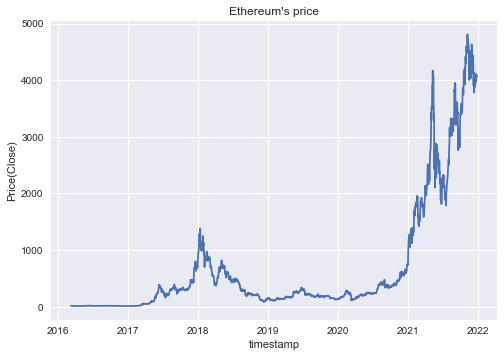

In [189]:
plt.plot(ether.index, ether['close'])

plt.title("Ethereum's price")
plt.xlabel('timestamp')
plt.ylabel('Price(Close)')

plt.show()

In [190]:
ether.to_csv('./data/ether_df.csv')